In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
datetime.datetime.strptime
from pandas import to_datetime
from collections import defaultdict
from scipy.stats.stats import pearsonr


In [3]:
df = pd.read_csv('customer_supermarket.csv', sep='\t', index_col=0) #alternative in case of json source df.to_json('filename.json')
df["Sale"] = df["Sale"].str.replace(",", ".").astype(float)
df["BasketDate"] = pd.to_datetime(df["BasketDate"])

df.head()

BasketID          BasketDate  Sale  CustomerID CustomerCountry  ProdID  \
0   536365 2010-01-12 08:26:00  2.55     17850.0  United Kingdom  85123A   
1   536365 2010-01-12 08:26:00  3.39     17850.0  United Kingdom   71053   
2   536365 2010-01-12 08:26:00  2.75     17850.0  United Kingdom  84406B   
3   536365 2010-01-12 08:26:00  3.39     17850.0  United Kingdom  84029G   
4   536365 2010-01-12 08:26:00  3.39     17850.0  United Kingdom  84029E   

                             ProdDescr  Qta  
0   WHITE HANGING HEART T-LIGHT HOLDER    6  
1                  WHITE METAL LANTERN    6  
2       CREAM CUPID HEARTS COAT HANGER    8  
3  KNITTED UNION FLAG HOT WATER BOTTLE    6  
4       RED WOOLLY HOTTIE WHITE HEART.    6

# DATA SEMANTICS



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  float64       
 3   CustomerID       406830 non-null  float64       
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471157 non-null  object        
 7   Qta              471910 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.4+ MB


Nel dataset si descrivono le sessioni di acquisto di un certo numero di clienti. Una sessione di acquisto, detta basket (BasketID) e si svolge in una data (BasketDate), e viene effettuata da un cliente (CustomerID) residente in uno stato (CustomerCountry).
Ogni sessione rappresenta una serie di prodotti acquistati da un cliente, e in un record è possibile ritrovare, per il singolo prodotto, l’identificativo (ProdID), la descrizione (ProdDescr), e  la quantità (Qtà). Infine viene riportato il costo unitario del prodotto (Sale).

# DISTRIBUTION OF VARIABLES AND STATISTICS


In [5]:
df.describe()

Sale     CustomerID            Qta
count  471910.000000  406830.000000  471910.000000
mean        4.030945   15287.684160      10.716533
std        83.769380    1713.603074     231.355136
min    -11062.060000   12346.000000  -80995.000000
25%         1.250000   13953.000000       1.000000
50%         2.080000   15152.000000       4.000000
75%         3.750000   16791.000000      12.000000
max     38970.000000   18287.000000   80995.000000

In [6]:
print("Distinct Values in BasketID: \n", df.BasketID.nunique())
print("Distinct Values in BasketDate:\n", df.BasketDate.nunique())
print("Distinct Values in Sale: \n", df.Sale.nunique())
print("Distinct Values in CustomerID: \n", df.CustomerID.nunique())
print("Distinct Values in CustomerCountry: \n", df.CustomerCountry.nunique())
print("Distinct Values in ProdID: \n", df.ProdID.nunique())
print("Distinct Values in ProdDescr: \n", df.ProdDescr.nunique())

Distinct Values in BasketID: 
 24627
Distinct Values in BasketDate:
 22428
Distinct Values in Sale: 
 1146
Distinct Values in CustomerID: 
 4372
Distinct Values in CustomerCountry: 
 38
Distinct Values in ProdID: 
 3953
Distinct Values in ProdDescr: 
 4097


Ore di maggiore traffico

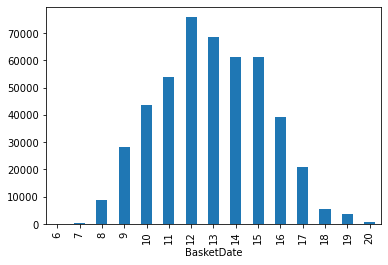

In [7]:
df.groupby(df["BasketDate"].dt.hour)["BasketID"].count().plot(kind="bar")

Date di maggiore traffico nel 2011

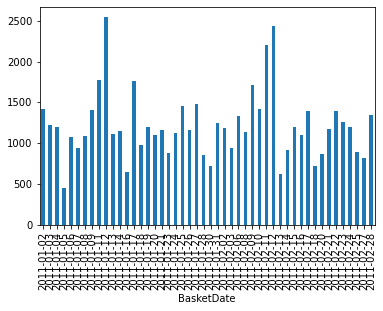

In [8]:
x=df[(df["BasketDate"].dt.year == 2011) & (df["BasketDate"].dt.month <3 )]


x.groupby(df["BasketDate"].dt.date)["BasketID"].count().plot(kind="bar")

Date di maggiore traffico nel 2010

20


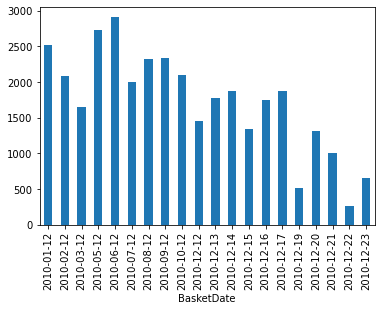

In [9]:
x=df[df["BasketDate"].dt.year == 2010]
print(x["BasketDate"].dt.date.nunique())
x.groupby(df["BasketDate"].dt.date)["BasketID"].count().plot(kind="bar")


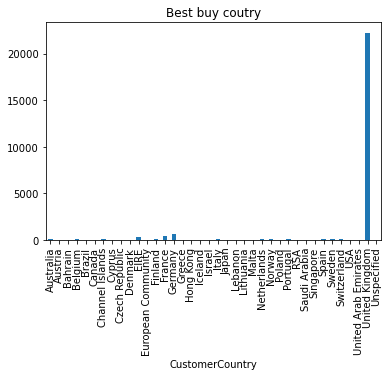

In [10]:
#paesi in cui sono stati effettuati piu acquisti
df.groupby('CustomerCountry')["BasketID"].nunique().plot(kind='bar',

title='Best buy coutry')

In [11]:
#verificare a cosa è dovuta la variazione di prezzo
df.groupby(["ProdID",'Qta'])["Sale"].unique()

ProdID        Qta
10002         -3                  [0.0]
               1     [0.85, 1.66, 1.63]
               2     [1.66, 0.85, 1.63]
               3                 [0.85]
               4                 [0.85]
                            ...        
gift_0001_30   1          [25.53, 25.0]
               30                 [0.0]
gift_0001_40   1         [34.04, 33.33]
gift_0001_50   1                [41.67]
m              1                 [2.55]
Name: Sale, Length: 42152, dtype: object

In [ ]:



#ASSESSING DATA QUALITY (MISSING VALUES, OUTLIERS)



In [14]:
df.info()
#unici null sono custmoerID

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  float64       
 3   CustomerID       406830 non-null  float64       
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471157 non-null  object        
 7   Qta              471910 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 52.4+ MB


Distribuzione delle quantità

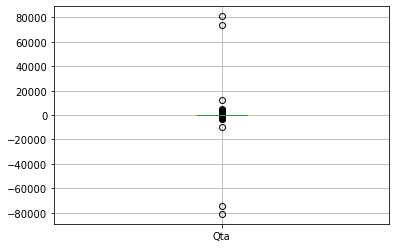

In [13]:
boxplot = df.boxplot(column=['Qta'])

In [16]:
#hanno tutto in comune tranno quantità opposta => errore, rimossi
df[df["Qta"] < -70000]

BasketID          BasketDate  Sale  CustomerID CustomerCountry ProdID  \
61624   C541433 2011-01-18 10:17:00  1.04     12346.0  United Kingdom  23166   
540422  C581484 2011-09-12 09:27:00  2.08     16446.0  United Kingdom  23843   

                             ProdDescr    Qta  
61624   MEDIUM CERAMIC TOP STORAGE JAR -74215  
540422     PAPER CRAFT , LITTLE BIRDIE -80995

In [17]:
df[df["Sale"] == 0] 
#1279 righe
df[(df["Sale"] == 0) & ~(df["CustomerID"].isnull()) & ( ~(df["ProdID"].isnull()) | ~(df["ProdDescr"].isnull()))]
#40 righe utilizzabili, basta che recupri il sale da un altro record
df[(df["Sale"] == 0) & (df["CustomerID"].isnull()) & ( ~(df["ProdID"].isnull()) | ~(df["ProdDescr"].isnull()) ) ]
#1239 righe, si può recuperare Sale solamente => vanno nel test set


BasketID          BasketDate  Sale  CustomerID CustomerCountry  ProdID  \
1986     536546 2010-01-12 14:33:00   0.0         NaN  United Kingdom   22145   
2024     536550 2010-01-12 14:34:00   0.0         NaN  United Kingdom   85044   
2025     536553 2010-01-12 14:35:00   0.0         NaN  United Kingdom   37461   
4347     536764 2010-02-12 14:42:00   0.0         NaN  United Kingdom  84952C   
4348     536765 2010-02-12 14:43:00   0.0         NaN  United Kingdom  84952C   
...         ...                 ...   ...         ...             ...     ...   
535334   581211 2011-07-12 18:36:00   0.0         NaN  United Kingdom   22142   
535335   581212 2011-07-12 18:38:00   0.0         NaN  United Kingdom   22578   
536981   581234 2011-08-12 10:33:00   0.0         NaN  United Kingdom   72817   
538504   581406 2011-08-12 13:58:00   0.0         NaN  United Kingdom  46000M   
538505   581406 2011-08-12 13:58:00   0.0         NaN  United Kingdom  46000S   

                           ProdDescr   Qta  
1986                             NaN     1  
2024                             NaN     1  
2025                             NaN     3  
4347                             NaN   -38  
4348                             NaN    19  
...                              ...   ...  
535334                         check    14  
535335                          lost -1050  
536981                           NaN    27  
538504  POLYESTER FILLER PAD 45x45cm   240  
538505  POLYESTER FILLER PAD 40x40cm   300  

[1239 rows x 8 columns]

In [18]:
#problemi del negozio, outlier da buttare
df[df["Sale"] < 0] 

BasketID          BasketDate      Sale  CustomerID CustomerCountry  \
299983  A563186 2011-12-08 14:51:00 -11062.06         NaN  United Kingdom   
299984  A563187 2011-12-08 14:52:00 -11062.06         NaN  United Kingdom   

       ProdID        ProdDescr  Qta  
299983      B  Adjust bad debt    1  
299984      B  Adjust bad debt    1

In [ ]:
#quantita negative, da gestire

In [19]:
df[df["Sale"] > 30000] #manual di valore massimo 
df[(df["ProdDescr"] == 'Manual')]
#se esiste un solo ProdId che ha tale Sale, possiamo fixarlo, altrimenti rimuoviamo/decidere

BasketID          BasketDate    Sale  CustomerID CustomerCountry  \
2239     536569 2010-01-12 15:35:00    1.25     16274.0  United Kingdom   
2250     536569 2010-01-12 15:35:00   18.95     16274.0  United Kingdom   
6798     536981 2010-03-12 14:26:00    0.85     14723.0  United Kingdom   
7976     537077 2010-05-12 11:59:00    0.42     17062.0  United Kingdom   
8530     537137 2010-05-12 12:43:00    0.85     16327.0  United Kingdom   
...         ...                 ...     ...         ...             ...   
531432   580956 2011-06-12 14:23:00    1.25     17841.0  United Kingdom   
533082  C581009 2011-07-12 09:15:00  125.00     16971.0  United Kingdom   
534308  C581145 2011-07-12 13:48:00    9.95     17490.0  United Kingdom   
538321   581405 2011-08-12 13:50:00    0.42     13521.0  United Kingdom   
541541  C581499 2011-09-12 10:28:00  224.69     15498.0  United Kingdom   

       ProdID ProdDescr  Qta  
2239        M    Manual    1  
2250        M    Manual    1  
6798        M    Manual    2  
7976        M    Manual   12  
8530        M    Manual   36  
...       ...       ...  ...  
531432      M    Manual    4  
533082      M    Manual   -1  
534308      M    Manual   -1  
538321      M    Manual    3  
541541      M    Manual   -1  

[507 rows x 8 columns]

Boxplot raggruppato per paese

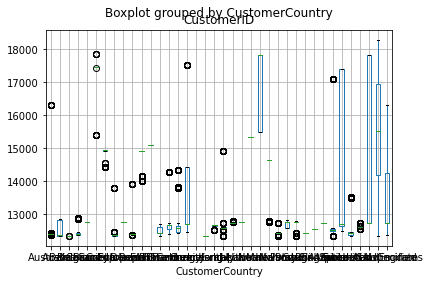

In [11]:
df.boxplot(column=["CustomerID"], by="CustomerCountry")

In [74]:
df[(df["Sale"] < 0)]

BasketID          BasketDate      Sale  CustomerID CustomerCountry  \
299983  A563186 2011-12-08 14:51:00 -11062.06         NaN  United Kingdom   
299984  A563187 2011-12-08 14:52:00 -11062.06         NaN  United Kingdom   

       ProdID        ProdDescr  Qta  
299983      B  Adjust bad debt    1  
299984      B  Adjust bad debt    1

<AxesSubplot:>

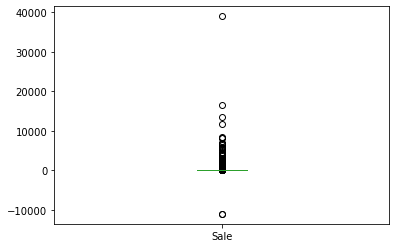

In [75]:
df["Sale"].plot.box()

In [83]:
df[(df["ProdDescr"] == "Manual") & (df["ProdID"] != "M")]

BasketID          BasketDate  Sale  CustomerID CustomerCountry ProdID  \
40383   539736 2010-12-21 15:18:00  2.55         NaN  United Kingdom      m   

      ProdDescr  Qta  
40383    Manual    1

In [ ]:


#VARIABLES TRANSFORMATION & GENERATION



In [ ]:


#PAIRWISE CORRELATION & ELIMINATION OF REDUNTANT VARIABLES